<a href="https://colab.research.google.com/github/charann90/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_Tvshows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do**




*   Exploratory Data Analysis

*   Understanding what type content is available in different countries

*   Has Netflix increasingly focused on TV as compared to movies in recent years?
*   Clustering similar content by matching text-based features





**Data Description**

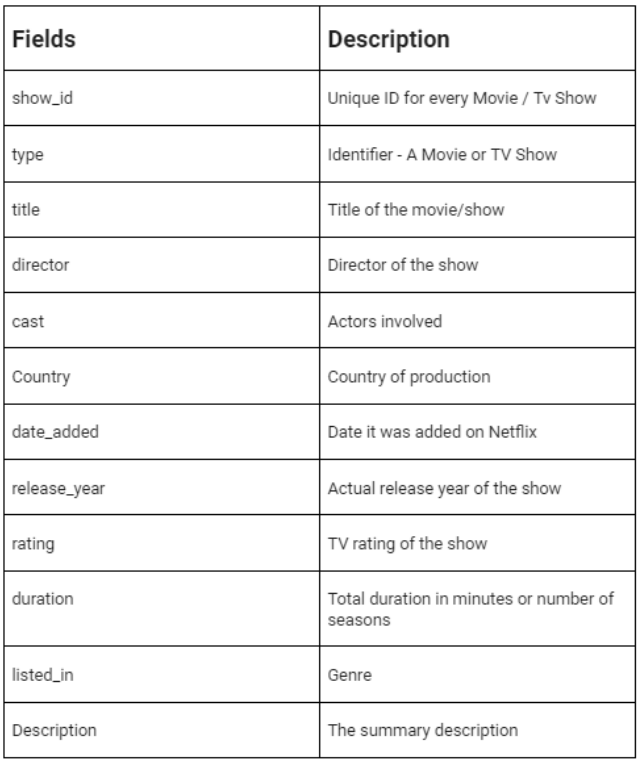

# Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data uploading

In [2]:
#uploading and reading the data
df=pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Data Wrangling

In [3]:
#getting the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
#understanding the statistical information
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# Data Cleaning

In [5]:
#checking the null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

The dataset contains a considerable number of null values across several columns, including director (2389), cast (718), country (507), date_added (10), and rating (7). Therefore, it is necessary to handle these null values to ensure data completeness and accuracy.

In [6]:
#dropping and replacing null valuse for different columns

#dropping null values of date_added and rating column as it has only single digit null values
df.dropna(subset=['date_added','rating'],inplace=True)
#replacing null values in director column by unknown
df['director'].fillna('unknown',inplace=True)
#replacing null values in country column by mode value of it
df['country'].fillna(df['country'].mode()[0],inplace=True)
#replacing null values in cast column by no cast
df['cast'].fillna('no cast',inplace=True)


In [7]:
#dropping unnessasary columns
df.drop(['show_id'],axis=1,inplace=True)

In [8]:
#checking null values after cleaning
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

After Data cleaning no null values are present. 

# EDA

Type of content available in different countries:

In [9]:
#count of type of content present in diffrent countries
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

We can see that movie content is double the number of TV shows

In [10]:
import seaborn as sns

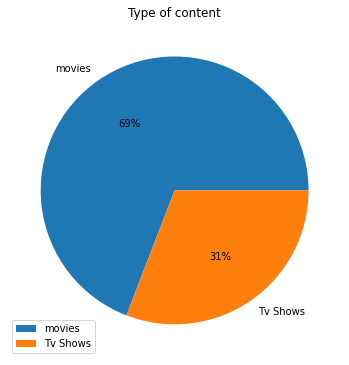

In [11]:
#plotting the type of content in the form of pie plot
plt.figure(figsize=(6,7))
plt.pie(df['type'].value_counts(),labels=['movies','Tv Shows'],autopct='%1.0f%%')
plt.title('Type of content')
plt.legend()
plt.show()


There are 69% of movie content and 31% of Tv show content in netflix

In [12]:
#replacing and converting datatype of duration column to integer

df['duration']=df['duration'].str.replace('Season','')
df['duration']=df['duration'].str.replace('s','')

In [13]:
#Replacing and converting datatype of duration column to integer
df['duration']=df['duration'].str.replace('min','')

df['duration']=df['duration'].astype(str).astype(int)

In [14]:
#creating a variable column for each type seperately
tv_shows=df[df['type']=='TV Show']
movie=df[df['type']=='Movie']

In [15]:
#count of movie and tv shows for different countries
df['country'].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [16]:
#percentage of ovreall share of movie/tvshow content for the top 10 countries 
df['country'].value_counts().nlargest(10).sum()/len(df)*100

69.54954954954955


*   Content of top 10 countries accounts for 69.54% for overall contents present




In [17]:
#crreating a movie variable for seperated type of content grouping with countries
country_movie=pd.DataFrame(movie.groupby(['country'])['type'].size().sort_values(ascending=False))

In [18]:
#renaming the column
country_movie.rename(columns={'type':'count'})

,count
country,
United States,2076
India,852
United Kingdom,193
Canada,118
Spain,89
...,...
"India, Switzerland",1
"India, Pakistan",1
"India, Nepal",1


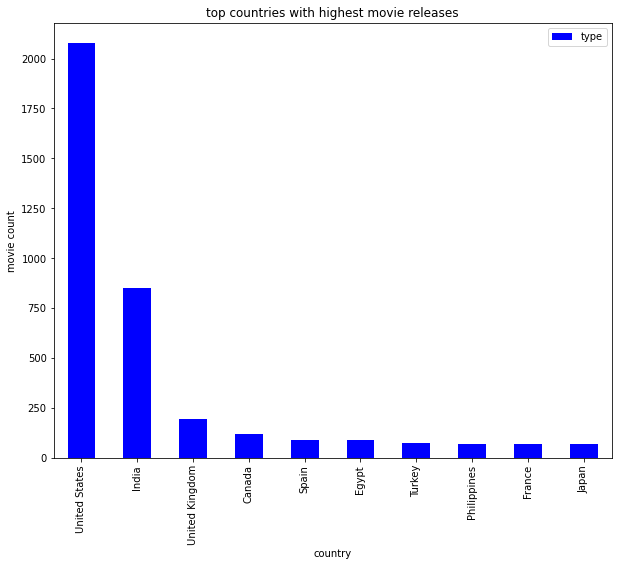

In [19]:
#plotting movie counts of top countries
country_movie.head(10).plot(kind='bar',figsize=(10,8),title='top countries with highest movie releases',color='b',ylabel='movie count')



**United Nations has highest movie content released and then followed by India** 




In [20]:
#creating a tvshow  variable for seperated tv shows type of content grouping with countries

country_tvshow=pd.DataFrame(tv_shows.groupby(['country'])['type'].size().sort_values(ascending=False))

In [21]:
#renaming the column
country_tvshow.rename(columns={'type':'count'})

,count
country,
United States,975
United Kingdom,203
Japan,155
South Korea,147
India,71
...,...
"Mexico, Spain",1
"China, Hong Kong",1
"Mauritius, South Africa",1


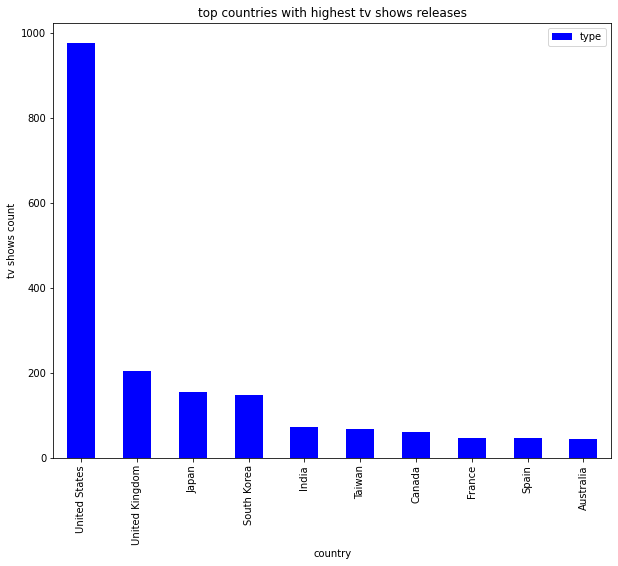

In [22]:
#plotting tv show counts of top countries
country_tvshow.head(10).plot(kind='bar',figsize=(10,8),title='top countries with highest tv shows releases',color='b',ylabel='tv shows count')

 **United Nations has highest tv show content released and then followed by United Kingdom**





---





In [23]:
#listing all the numerical columns
num_col=['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description']

In [24]:
#comparing type of content in different years
release_df=df.groupby(['release_year','type'])['release_year'].count().unstack()

In [25]:
release_df.tail(10)

type,Movie,TV Show
release_year,,
2012,158.0,60.0
2013,202.0,63.0
2014,244.0,90.0
2015,380.0,156.0
2016,642.0,239.0
2017,742.0,268.0
2018,734.0,386.0
2019,582.0,414.0
2020,411.0,457.0


Text(0.5, 0, 'Release year ')

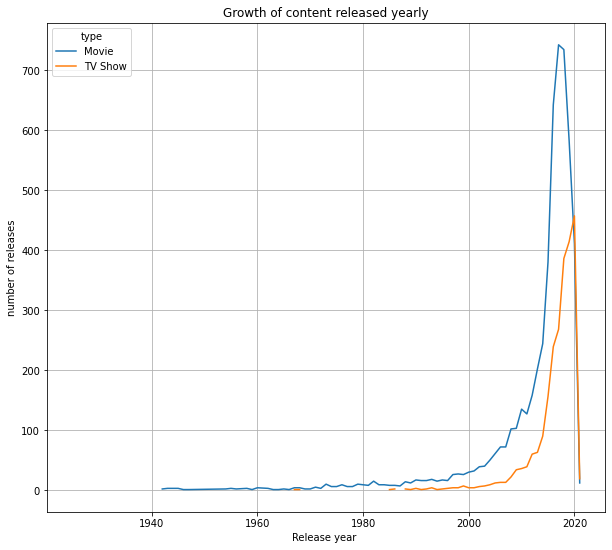

In [26]:
#plotting sum of contentent released in different years
release_df.plot(figsize=(10,9),grid=True)
plt.title('Growth of content released yearly')
plt.ylabel('number of releases')
plt.xlabel('Release year ')



*   Netflix started releasing movies after 1940 and after 1980 Tv show content was started streaming.
*   we can see that there is a graduall increase in releases after 2000 where movie content releases are more then Tv show content
*  The number of movies is increasing at a faster rate compared to TV shows. 
*  Additionally, there was a considerable rise in the number of movies and TV episodes added to the platform after 2015. 
*  However, there has been a significant decline in the production of both movies and TV episodes after 2020.



In [27]:
#creating seperate columns for month and year from release date column
df['month']=pd.DatetimeIndex(df['date_added']).month
df['year']=pd.DatetimeIndex(df['date_added']).year
df.drop(['release_year'],axis=1,inplace=True)

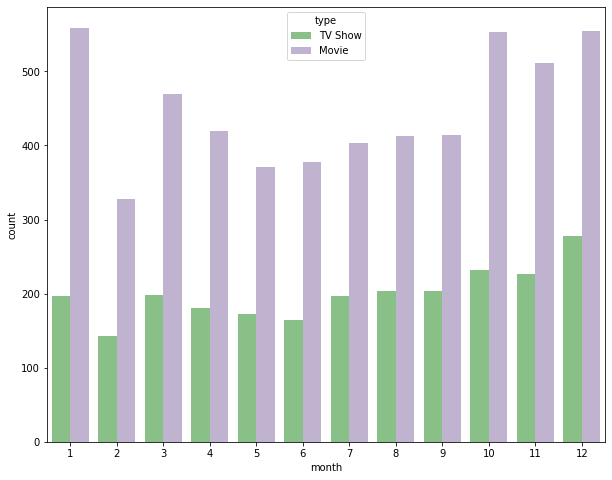

In [28]:
#plotting monthly content released for both movies and Tv shows
plt.figure(figsize=(10,8))
sns.countplot(x='month',hue='type',data=df,palette="Accent")



*   It is concluded that in the month of january, october and december maximum 
movies/tvshows has been released.




**Top Movie/TV Show content type with respect to duration**

Text(0.5, 1.0, 'length distribution of movies')

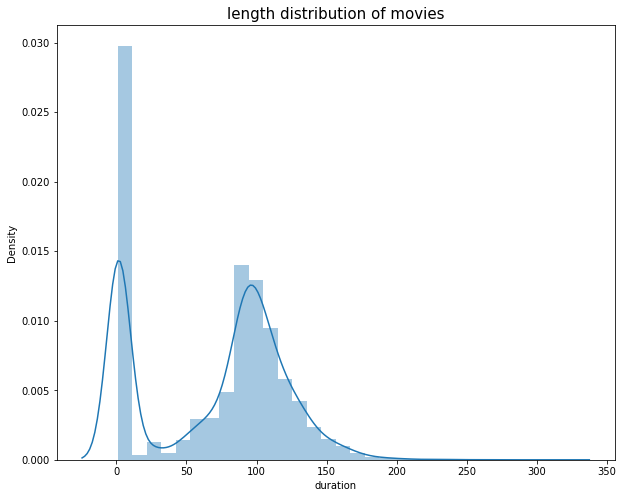

In [29]:
#plotting distribution plot for duration to see the frequency distribution 
plt.figure(figsize=(10,8))
sns.distplot(df['duration'],bins=30)
plt.title('length distribution of movies',fontsize=15)

The mean duration of movies is 100 minutes

In [30]:
#creating a table for movies with highest duration
long_movies=movie[['title','duration']]
long_movies.sort_values(by=['duration'],ascending=False)

,title,duration
957,Black Mirror: Bandersnatch,312
6850,The School of Mischief,253
4490,No Longer kids,237
3694,Lock Your Girls In,233
5108,Raya and Sakina,230
...,...,...
463,American Factory: A Conversation with the Obamas,10
1203,Canvas,9
1501,Cops and Robbers,8
5694,Sol Levante,5




*   Black Mirror: Bandersnatch	is the longest movie which is 312 minutes long and the second is The School of Mischief	.




In [31]:
#creating a table for Tv shows with highest duration
long_tv_shows=tv_shows[['title','duration']]
long_tv_shows.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
...,...,...
3563,Learning Songs by Little Baby Bum: Nursery Rhy...,1
3550,Laws of Attraction,1
3548,Lavender,1
610,Atelier,1




*  Grey's Anatomy		is longest Tv show which has 16 seasons and followed by Supernatural which has 15 seasons




**Most occured Categories for movies and Tv shows**

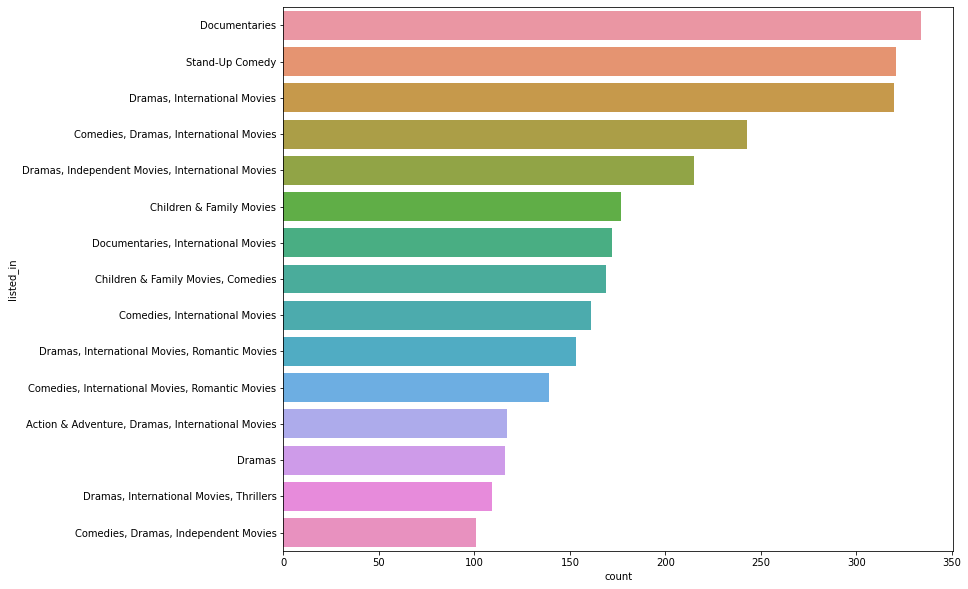

In [32]:
#top categories of movies
plt.figure(figsize=(12,10))
sns.countplot(y=movie['listed_in'],data=df,order=movie['listed_in'].value_counts().index[:15])



*   Movies which are documentaries and stand up comedy has highest content in netflix



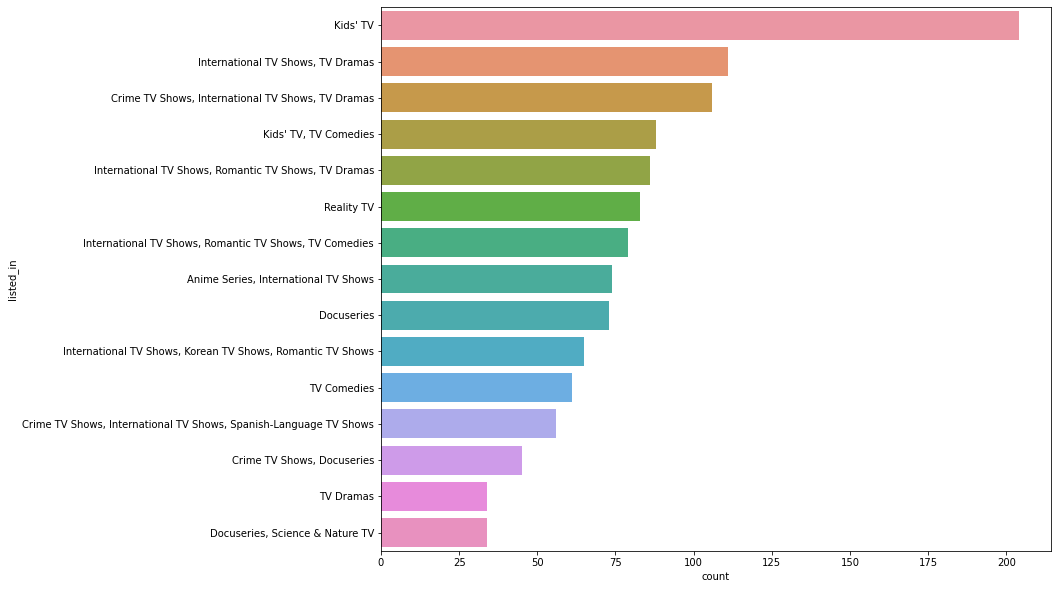

In [33]:
#top categories of Tv shows
plt.figure(figsize=(12,10))
sns.countplot(y=tv_shows['listed_in'],data=df,order=tv_shows['listed_in'].value_counts().index[:15])



*   Tv shows for kids category has highest content in netflix




**Most popular ratings for Tvshows/Movies**



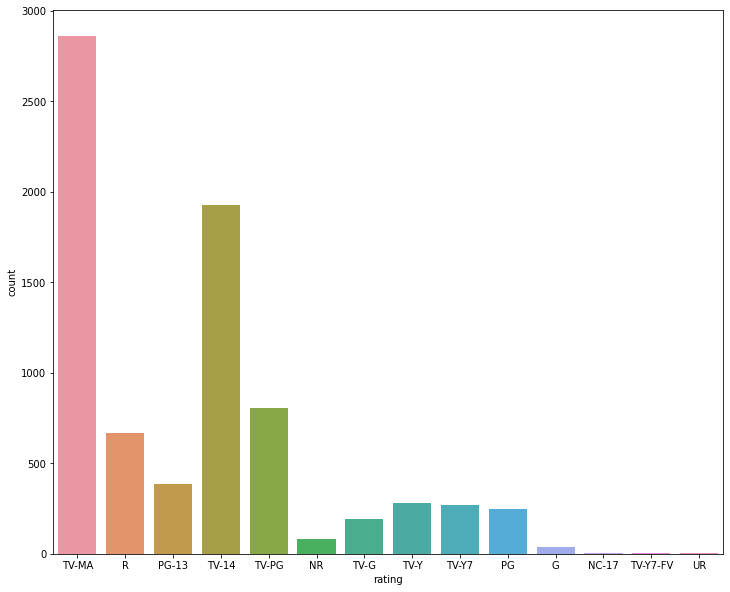

In [34]:
#plotting top movie content rating 
plt.figure(figsize=(12,10))
sns.countplot(df['rating'])



*   Most of the contents got rating TV_MA(Mature Audience) and the second most rated contents is for Tv-14(excludes children)



In [35]:
df.head(5)

,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year
0,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020


In [36]:
df.shape

(7770, 12)

In [37]:
df.head()

,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year
0,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020


In [38]:
#merging all the text columns
df['clustered_data']=(df['title']+' '+df['listed_in']+' '+df['cast']+' '+df['description'])
#clustered_df.set_index('title',inplace=True)
df.head()

,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year,clustered_data
0,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020,"3% International TV Shows, TV Dramas, TV Sci-F..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016,"7:19 Dramas, International Movies Demián Bichi..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018,"23:59 Horror Movies, International Movies Tedd..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017,"9 Action & Adventure, Independent Movies, Sci-..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020,"21 Dramas Jim Sturgess, Kevin Spacey, Kate Bos..."


In [39]:
df['clustered_data'][8]

"706 Horror Movies, International Movies Divya Dutta, Atul Kulkarni, Mohan Agashe, Anupam Shyam, Raayo S. Bakhirta, Yashvit Sancheti, Greeva Kansara, Archan Trivedi, Rajiv Pathak When a doctor goes missing, his psychiatrist wife treats the bizarre medical condition of a psychic patient, who knows much more than he's leading on."

# Feature Engineering and data preprocessing

**Removing punctuations for the text column**

In [40]:
#removing punctuations from the clustered data
def remove_punctuations(text):
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)
df['clustered_data']=df['clustered_data'].apply(remove_punctuations)  

In [41]:
df['clustered_data']

0       3 International TV Shows TV Dramas TV SciFi  F...
1       719 Dramas International Movies Demián Bichir ...
2       2359 Horror Movies International Movies Tedd C...
3       9 Action  Adventure Independent Movies SciFi  ...
4       21 Dramas Jim Sturgess Kevin Spacey Kate Boswo...
                              ...                        
7782    Zozo Dramas International Movies Imad Creidi A...
7783    Zubaan Dramas International Movies Music  Musi...
7784    Zulu Man in Japan Documentaries International ...
7785    Zumbos Just Desserts International TV Shows Re...
7786    ZZ TOP THAT LITTLE OL BAND FROM TEXAS Document...
Name: clustered_data, Length: 7770, dtype: object

**Removing stop words**

In [42]:
#removing all thne stopwords from the clustered data
sw = nltk.corpus.stopwords.words('english')
def stopword(txt):
  description=[word.lower() for word in txt.split() if word.lower() not in sw]
  return ' '.join(description)

df['clustered_data']=df['clustered_data'].apply(stopword)

The removal of stopwords can help to reduce the size of the text corpus, and also improve the accuracy and efficiency of downstream tasks such as text classification

In [43]:
df['clustered_data']

0       3 international tv shows tv dramas tv scifi fa...
1       719 dramas international movies demián bichir ...
2       2359 horror movies international movies tedd c...
3       9 action adventure independent movies scifi fa...
4       21 dramas jim sturgess kevin spacey kate boswo...
                              ...                        
7782    zozo dramas international movies imad creidi a...
7783    zubaan dramas international movies music music...
7784    zulu man japan documentaries international mov...
7785    zumbos desserts international tv shows reality...
7786    zz top little ol band texas documentaries musi...
Name: clustered_data, Length: 7770, dtype: object

**Stemming**

In [44]:
#stemming all the text data for  better understanding 
stemmer = SnowballStemmer('english')
def stemming(text):
  stemmer = SnowballStemmer('english')
  description=[stemmer.stem(word) for word in text.split()]

  return ' '.join(description)

df['clustered_data']=df['clustered_data'].apply(stemming)  

This is a common preprocessing step that can help to reduce the number of unique words in a text corpus and improve the efficiency of downstream tasks such as text classification

**Tokenizing the data**

In [45]:
#calling a function to give token values for each word in a sentence
def tokenizer(text):
  word_tokens=word_tokenize(text)
  return word_tokens

df['clustered_data']=df['clustered_data'].apply(tokenizer)

Tokenizing is the process of breaking up a text into smaller units called tokens, such as words or subwords, to facilitate further analysis and processing

**Lemmatization**

In [46]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [47]:
#defining a function to lammatize the words
def lemma(txt):
    lemma=WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in txt]
    x=" ".join(description)
    return x
#applying the function    
df['clustered_data']=df['clustered_data'].apply(lemma)    

Lemmatization is a technique that involves reducing words to their base or dictionary form, called a lemma, in order to improve text analysis and processing.

In [48]:
#deleting all the numbers
import re

def numb(txt):
  text=re.sub(r'[0-9]+', '', txt)
  return text

df['clustered_data']=df['clustered_data'].apply(numb)    

Text(0.5, 1.0, 'word cloud')

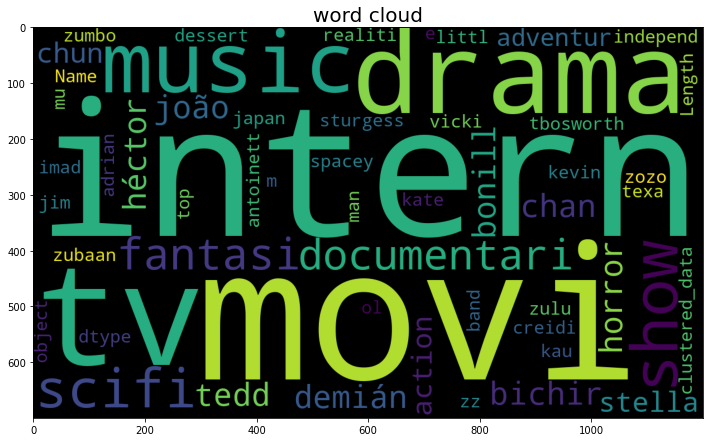

In [49]:
from wordcloud import WordCloud
#generating the word cloud for the text data
wordcloud=WordCloud(background_color = 'black',width = 1200,height = 700).generate(str(df['clustered_data']))

plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.title('word cloud',fontsize=20)


**Getting Frequency of each word by applying countvectorizer** 

CountVectorizer is a technique used to convert a collection of text documents into a matrix of token counts. After applying CountVectorizer, we can obtain the frequency of each word in the text corpus.

In [50]:
#defining function for word frequency count
count_vectorizer=CountVectorizer()
cv=count_vectorizer.fit(df['clustered_data'])


dictionary=cv.vocabulary_.items()

In [51]:
dictionary

dict_items([('intern', 17379), ('tv', 38513), ('show', 34128), ('drama', 10239), ('scifi', 32982), ('fantasi', 12013), ('joão', 18634), ('miguel', 24317), ('bianca', 4222), ('comparato', 7710), ('michel', 24246), ('gome', 14166), ('rodolfo', 31436), ('valent', 39177), ('vaneza', 39248), ('oliveira', 27169), ('rafael', 30095), ('lozano', 22107), ('vivian', 39787), ('porto', 29256), ('mel', 23941), ('fronckowiak', 13028), ('sergio', 33396), ('mamberti', 22813), ('zezé', 41758), ('motta', 25159), ('celso', 6424), ('frateschi', 12913), ('futur', 13192), ('elit', 10987), ('inhabit', 17271), ('island', 17572), ('paradis', 27984), ('far', 12023), ('crowd', 8334), ('slum', 34716), ('get', 13725), ('one', 27260), ('chanc', 6593), ('join', 18477), ('save', 32732), ('squalor', 35386), ('movi', 25201), ('demián', 9214), ('bichir', 4238), ('héctor', 16797), ('bonilla', 4800), ('oscar', 27448), ('serrano', 33416), ('azalia', 2873), ('ortiz', 27435), ('octavio', 26915), ('carmen', 6139), ('beato', 36

In [52]:
#creating a list of word and it's count value in a the form of a dataframe
word=[]
count=[]
for value, key in dictionary:
  word.append(value)
  count.append(key)

In [53]:
#Dataframe which is sorted by their value count
freq_df=pd.DataFrame({'word':word,'count':count}).sort_values(by='count',ascending=False)
freq_df

,word,count
25283,탄생,42146
25280,최강전사,42145
24533,잡는다,42144
25282,영웅의,42143
24532,반드시,42142
...,...,...
25135,aadarsh,4
34329,aacharekar,3
41290,aachal,2
39675,aabha,1


These are the list of the total frequency of each word in the entire corpus.

In [54]:
top_words=freq_df.head(20)

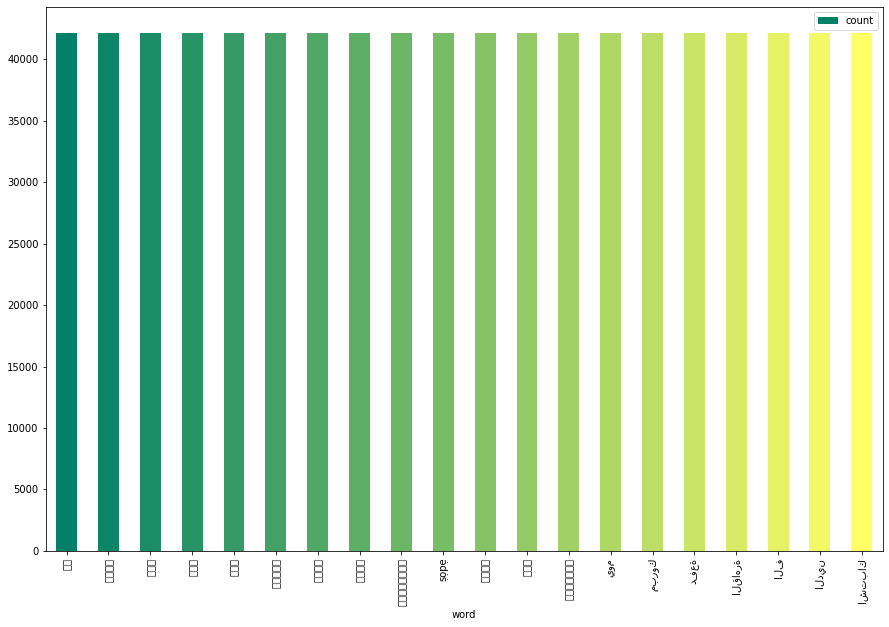

In [55]:
#plotting the top 20 words which is largely repeated
top_words.plot(kind='bar',x='word',y='count',figsize=(15,10),color = plt.cm.summer(np.linspace(0, 1, 20)))

# TFIDF (Term Frequency-Inverse Document Frequency)

TF-IDF stands for "Term Frequency-Inverse Document Frequency." It is a numerical statistic used to evaluate the importance of a term within a document or a corpus of documents. TF-IDF takes into account the frequency of a term within a document (TF) and the frequency of the term within the entire corpus of documents (IDF). The idea behind TF-IDF is that words that occur frequently within a document but rarely in the corpus are likely to be important for that specific document. Conversely, words that occur frequently in the corpus but less frequently in a particular document are less likely to be significant for that document.

In [56]:
#creating the object for tfid vectoriser
tfid=TfidfVectorizer(stop_words='english',lowercase=False,max_features=5000)
x_tfid=tfid.fit_transform(df['clustered_data'])

In [57]:
x_tfid

<7770x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 177878 stored elements in Compressed Sparse Row format>

In [58]:
#converting the metrix into array
x=x_tfid.toarray()

In [59]:
#calling all the feature names
tfid.get_feature_names()

['aamir',
 'aaron',
 'abandon',
 'abbi',
 'abbott',
 'abdel',
 'abduct',
 'abdullah',
 'abe',
 'abel',
 'abhay',
 'abhishek',
 'abigail',
 'abil',
 'aboard',
 'abou',
 'abraham',
 'abroad',
 'absurd',
 'abu',
 'abus',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'account',
 'accus',
 'achiev',
 'acosta',
 'act',
 'action',
 'actionpack',
 'activ',
 'activist',
 'actor',
 'actress',
 'actual',
 'ad',
 'ada',
 'adam',
 'adapt',
 'addict',
 'adebayo',
 'adel',
 'adesua',
 'adil',
 'aditi',
 'aditya',
 'adjust',
 'adkin',
 'adnan',
 'adolesc',
 'adopt',
 'ador',
 'adrian',
 'adriana',
 'adriano',
 'adrienn',
 'adrián',
 'adult',
 'adulthood',
 'adventur',
 'advic',
 'affair',
 'affect',
 'affleck',
 'afghanistan',
 'afloat',
 'africa',
 'african',
 'aftermath',
 'age',
 'agenc',
 'agent',
 'ago',
 'agre',
 'ahead',
 'ahm',
 'ahmad',
 'ahmet',
 'ahn',
 'ai',
 'aid',
 'aida',
 'aidan',
 'ail',
 'aim',
 'aime',
 'air',
 'aishwarya',
 'aj',
 'ajay',
 'akb

In [60]:
#converting x to array
df_all= pd.DataFrame(x,columns=tfid.get_feature_names())

In [61]:
x.shape

(7770, 5000)

# Principle component analysis for dimensionality reduction

To find the most important features (also called principal components) that explain the maximum variance in the data

In [62]:
#defining a pca variable
pca=PCA()
pca1=pca.fit_transform(df_all)

Text(0, 0.5, 'eVR')

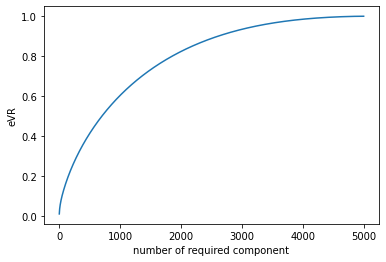

In [63]:
#plotting the percentage of varience of the matrix by 
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of required component")
plt.ylabel("eVR")

**In the selected 3000 components after pca dimensionality reduction we require 1500 components to summarize 90 percent of data** 

In [64]:
#dimensionality reduction after getting to know number of components to summarize
pca=PCA(n_components=3000)
f_pca=pca.fit_transform(df_all)

In [65]:
f_pca

array([[ 0.15717143, -0.01924209, -0.0021011 , ..., -0.00776709,
         0.00369392, -0.00310395],
       [-0.04658064, -0.02372338,  0.01994317, ...,  0.00558675,
        -0.00537384,  0.00402484],
       [-0.04764466, -0.04773479, -0.00343519, ..., -0.0005274 ,
        -0.00085294, -0.00081726],
       ...,
       [-0.13036998,  0.25061112,  0.15631089, ..., -0.00944143,
        -0.00592179,  0.00358171],
       [ 0.14856046,  0.02710663,  0.01164641, ...,  0.00684088,
         0.0047047 ,  0.00161129],
       [-0.11275314,  0.35627436,  0.11014989, ...,  0.0090036 ,
        -0.01027831, -0.00964508]])

*  The most important features that explain the majority of the variance in the data can be identified.
* The reduced set of principal components can be used to visualize the data and identify patterns and relationships.
* The new reduced dataset can be used for further analysis and modeling.

In [66]:
y_df=pd.DataFrame(f_pca)

In [67]:
y_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
count,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,...,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03
mean,6.435579e-17,5.286776e-17,-3.795048e-17,1.520305e-17,-9.144694e-18,3.886495e-18,4.572347e-18,-2.709116e-17,6.887098e-18,6.286977e-19,...,7.814070e-17,-4.207988e-17,1.124619e-16,2.609810e-17,-2.899154e-17,7.226809e-17,3.877207e-17,-1.662048e-16,2.763412e-17,-7.447925e-18
std,9.772580e-02,7.706113e-02,6.905516e-02,6.481308e-02,6.037110e-02,5.820647e-02,5.535091e-02,5.281045e-02,5.157967e-02,4.927105e-02,...,8.148355e-03,8.134285e-03,8.129886e-03,8.126051e-03,8.119437e-03,8.101078e-03,8.080587e-03,8.069506e-03,8.057599e-03,8.052133e-03
min,-1.542422e-01,-1.281594e-01,-2.186440e-01,-1.919013e-01,-2.005380e-01,-1.967330e-01,-1.971080e-01,-2.229254e-01,-1.645873e-01,-2.232074e-01,...,-3.053959e-02,-3.052000e-02,-2.963242e-02,-2.983948e-02,-3.176530e-02,-3.123570e-02,-3.407536e-02,-2.942848e-02,-2.898563e-02,-2.921764e-02
25%,-6.296316e-02,-4.531971e-02,-5.229186e-02,-3.213885e-02,-3.395092e-02,-2.684167e-02,-3.053331e-02,-3.330755e-02,-3.036193e-02,-2.954060e-02,...,-5.420819e-03,-5.281439e-03,-5.386920e-03,-5.517468e-03,-5.358028e-03,-5.390145e-03,-5.465461e-03,-5.206325e-03,-5.248462e-03,-5.440682e-03
50%,-4.603715e-02,-2.475860e-02,-4.575329e-03,-8.743900e-03,-1.254228e-03,-5.473038e-03,3.574535e-03,-4.226833e-03,-2.380877e-03,-9.230686e-04,...,-1.199975e-04,-2.795340e-05,6.225882e-05,-1.040939e-05,7.367487e-05,-1.409878e-05,9.228789e-05,8.037336e-05,4.371071e-05,1.219774e-05
75%,5.241029e-02,7.967355e-03,4.693232e-02,1.414895e-02,2.775029e-02,1.907413e-02,3.404555e-02,2.939631e-02,2.176578e-02,2.903535e-02,...,5.616089e-03,5.347060e-03,5.500745e-03,5.530508e-03,5.338819e-03,5.425752e-03,5.362206e-03,5.309298e-03,5.350566e-03,5.316730e-03
max,3.758146e-01,3.859974e-01,2.938281e-01,4.951903e-01,3.911947e-01,5.026118e-01,2.315381e-01,3.193246e-01,3.451143e-01,2.372231e-01,...,3.095216e-02,3.063376e-02,3.263223e-02,3.176205e-02,4.186699e-02,3.142960e-02,3.987076e-02,3.087298e-02,3.698982e-02,3.698879e-02


# Clustering

# KMeans Clustering 

In [69]:
#scaling the data
scalar=StandardScaler()
rescaled=scalar.fit_transform(y_df)
scaled_values=rescaled

In [70]:
df2=pd.DataFrame(scaled_values)

In [71]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
count,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,...,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03
mean,5.852604e-17,-1.463151e-17,6.767074e-17,5.486816e-18,8.413119e-17,-3.657878e-18,9.144694e-18,9.144694e-17,-1.005916e-17,-2.560514e-17,...,-4.115112e-18,-5.669710e-17,-2.423344e-17,-1.828939e-18,-9.144694e-18,-1.828939e-18,1.828939e-18,1.554598e-17,-1.097363e-17,-1.280257e-17
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,...,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00
min,-1.578418e+00,-1.663195e+00,-3.166426e+00,-2.961032e+00,-3.321968e+00,-3.380134e+00,-3.561291e+00,-4.221509e+00,-3.191139e+00,-4.530485e+00,...,-3.748186e+00,-3.752261e+00,-3.645110e+00,-3.672313e+00,-3.912506e+00,-3.855994e+00,-4.217212e+00,-3.647110e+00,-3.597535e+00,-3.628792e+00
25%,-6.443254e-01,-5.881386e-01,-7.572964e-01,-4.959017e-01,-5.624066e-01,-4.611755e-01,-5.516672e-01,-6.307406e-01,-5.886793e-01,-5.995914e-01,...,-6.653083e-01,-6.493231e-01,-6.626496e-01,-6.790289e-01,-6.599439e-01,-6.654043e-01,-6.764129e-01,-6.452266e-01,-6.514099e-01,-6.757257e-01
50%,-4.711153e-01,-3.213059e-01,-6.626042e-02,-1.349182e-01,-2.077665e-02,-9.403405e-02,6.458368e-02,-8.004297e-02,-4.616219e-02,-1.873571e-02,...,-1.472754e-02,-3.436712e-03,7.658511e-03,-1.281072e-03,9.074474e-03,-1.740470e-03,1.142167e-02,9.960774e-03,5.425130e-03,1.514943e-03
75%,5.363339e-01,1.033967e-01,6.796790e-01,2.183180e-01,4.596914e-01,3.277188e-01,6.151253e-01,5.566741e-01,4.220108e-01,5.893363e-01,...,6.892742e-01,6.573908e-01,6.766514e-01,6.806337e-01,6.575779e-01,6.697999e-01,6.636340e-01,6.579882e-01,6.640825e-01,6.603310e-01
max,3.845850e+00,5.009299e+00,4.255251e+00,7.640776e+00,6.480251e+00,8.635537e+00,4.183365e+00,6.047007e+00,6.691328e+00,4.814965e+00,...,3.798823e+00,3.766248e+00,4.014119e+00,3.908922e+00,5.156723e+00,3.879931e+00,4.934459e+00,3.826128e+00,4.590971e+00,4.593960e+00


**Elbow method to find the number of clusters**

Text(0, 0.5, 'sum of squared distances')

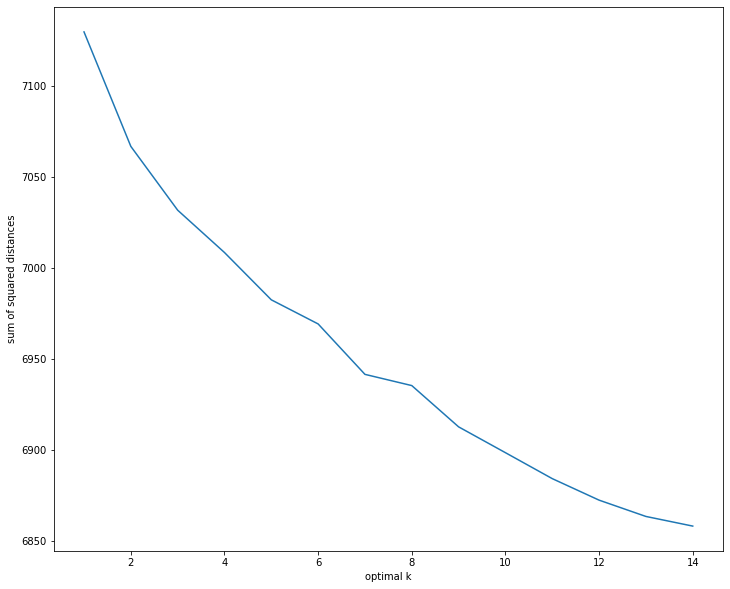

In [72]:
#Implementaing kmeans clustering
#considering range of 10 clusters

silhoutte_score=[]
value=[]
range=np.arange(1,15)
for i in range:
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=30)
  preds=kmeans.fit(f_pca)
  pred_values=preds.inertia_
  value.append(pred_values)


plt.figure(figsize=(12,10))
plt.plot(range,value)
plt.xlabel('optimal k')
plt.ylabel('sum of squared distances')
  





**By plotting the optimal k by using Elbow method there are 7 clusters which are optimal**

In [73]:
#applying kmeans after knowing number of clusters 
kmean1= KMeans(n_clusters=7 ,init = 'k-means++' , random_state=30)
labels=kmean1.fit_predict(y_df)

In [74]:
y_df['cluster_number']=labels


In [75]:
#componenets present in each cluster
y_df['cluster_number'].value_counts()

1    2444
2    2078
5    1662
4     704
3     378
0     336
6     168
Name: cluster_number, dtype: int64

In [76]:
y_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,cluster_number
0,0.157171,-0.019242,-0.002101,0.001361,-0.046245,-0.009440,-0.011058,-0.009718,-0.053567,-0.005856,...,-0.014878,0.022722,-0.008487,0.001560,0.000530,0.004045,-0.007767,0.003694,-0.003104,5
1,-0.046581,-0.023723,0.019943,-0.026157,0.001194,-0.006948,-0.005729,-0.018323,0.000677,-0.010568,...,-0.003172,-0.000021,-0.018293,0.007077,-0.006095,0.000403,0.005587,-0.005374,0.004025,2
2,-0.047645,-0.047735,-0.003435,-0.039787,-0.044303,0.059706,-0.001708,-0.018652,0.053553,0.009601,...,-0.000572,0.018749,0.004409,-0.001349,-0.006146,-0.005567,-0.000527,-0.000853,-0.000817,1
3,-0.059854,-0.048335,-0.121134,-0.018272,-0.125009,0.044003,-0.059949,0.013742,-0.031400,0.083738,...,-0.010212,-0.005516,0.002376,0.002944,-0.002155,0.014410,0.006601,-0.001580,-0.001595,1
4,-0.033125,-0.023857,-0.060975,0.004633,-0.007856,0.013929,0.007709,-0.055873,-0.001394,0.033720,...,-0.002953,0.002834,0.001876,-0.008883,-0.011166,-0.008189,-0.023197,-0.009252,-0.018771,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,-0.061825,-0.039790,0.021902,-0.044685,-0.011281,-0.014026,0.047249,0.024127,0.008777,-0.077621,...,0.005031,0.001156,-0.011896,-0.012180,0.019480,-0.017968,-0.003371,0.012074,-0.012354,2
7766,-0.103854,0.055194,0.156886,0.288187,-0.131840,-0.054355,0.044750,0.008294,0.054404,-0.039484,...,0.000549,-0.005256,-0.003830,0.008945,-0.004516,-0.000258,0.005868,-0.005299,-0.000685,0
7767,-0.130370,0.250611,0.156311,0.200909,-0.078263,0.029373,-0.015291,-0.040023,-0.035491,-0.002786,...,0.002044,-0.008112,0.002813,-0.006042,0.017857,0.000461,-0.009441,-0.005922,0.003582,0
7768,0.148560,0.027107,0.011646,0.002699,0.012879,-0.033792,0.018361,0.011833,-0.035926,-0.000388,...,-0.005465,-0.003735,0.001485,-0.008915,0.011960,-0.013069,0.006841,0.004705,0.001611,5


for n_clusters:  2
silhouette_score is: 0.5343788941170085
for n_clusters:  3
silhouette_score is: 0.31026275484243826
for n_clusters:  4
silhouette_score is: 0.22495560856920477
for n_clusters:  5
silhouette_score is: 0.2181320713328817
for n_clusters:  6
silhouette_score is: 0.2047741365293245
for n_clusters:  7
silhouette_score is: 0.20455185262196213


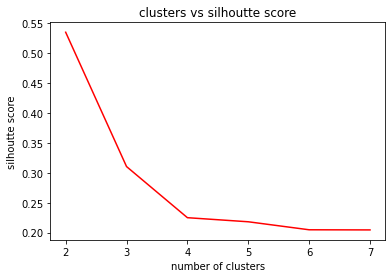

In [77]:
#silhouette method to find the optimal clusters
#range=np.arange(1,20)
silhoutte_score=[]
value=[]
range=np.arange(2,8)
for i in range:
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=33)
  preds=kmeans.fit(y_df)
  pred_values=preds.labels_
  sil_score=silhouette_score(y_df,pred_values, metric='euclidean')
  silhoutte_score.append(silhouette_score(y_df,pred_values, metric='euclidean'))
  silhouette_values = silhouette_samples(f_pca, pred_values)
  print('for n_clusters: ', i)
  #for value in score:
  print('silhouette_score is: {}'.format(sil_score))

#plotting the graph for all the values
plt.plot(range,silhoutte_score,color='red')
plt.xlabel('number of clusters')
plt.ylabel('silhoutte score')
plt.title('clusters vs silhoutte score' )
plt.show()
  

Text(0.5, 0, 'PC1')

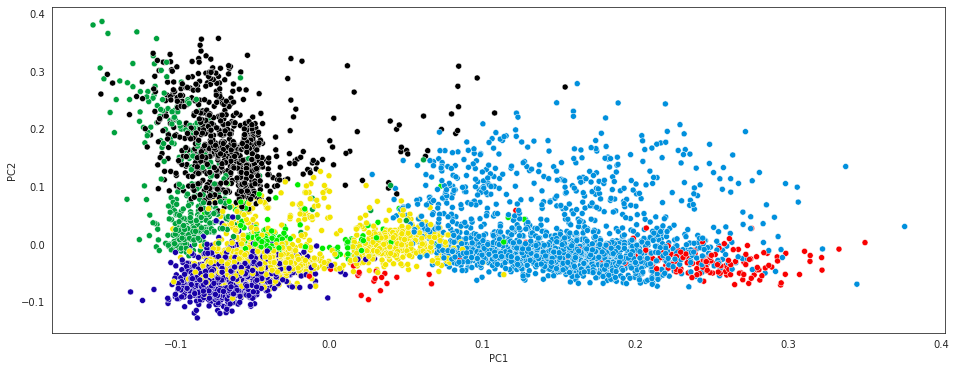

In [78]:
#for n_cluster in range:
colors = cm.nipy_spectral(pred_values.astype(float) /7)
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(f_pca[:,0],f_pca[:,1],c=colors)
plt.ylabel('PC2')
plt.xlabel('PC1')



*   Based on the given information, the silhouette score for clustering is highest when there are 2 clusters with a value of 0.534
*   Cluster 4 has the highest text  values


*   Additionally, the statement suggests that as the number of clusters increases, the silhouette score tends to decrease, indicating that the quality of the clusters decreases as the number of clusters increases.





# Heirarchical clustering

Choosing the number of clusters using dendrogram

Text(0, 0.5, 'euclidean distance')

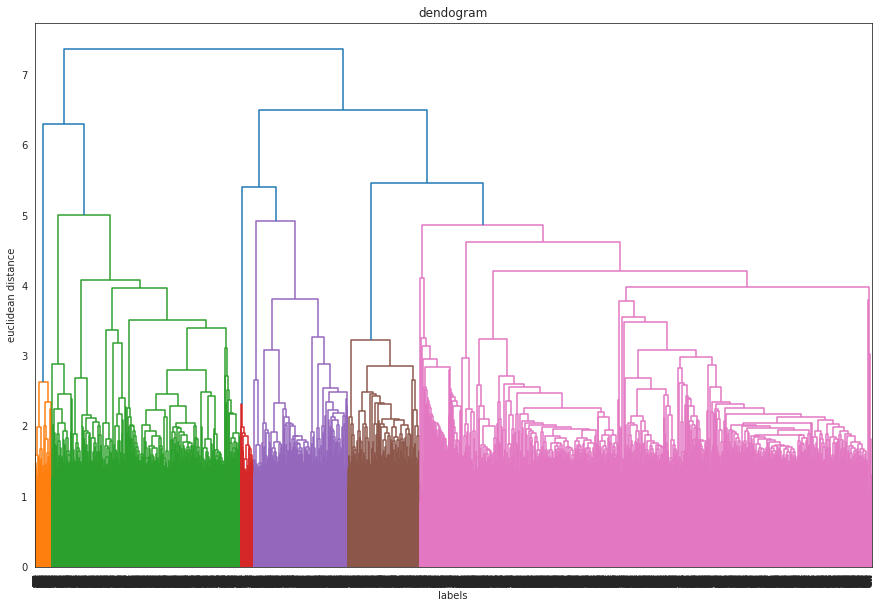

In [80]:
#plotting the dendrogram plot to find the clusters
plt.figure(figsize=(15,10))
shc.dendrogram((shc.linkage(f_pca, method ='ward')))
plt.title('dendogram')
plt.xlabel('labels')
plt.ylabel('euclidean distance')

**By identifying the vertical line with the greatest distance between two lines, at a distance of 6, it is possible to draw a horizontal line that will result in 4 distinct clusters**

Text(0, 0.5, 'euclidean distance')

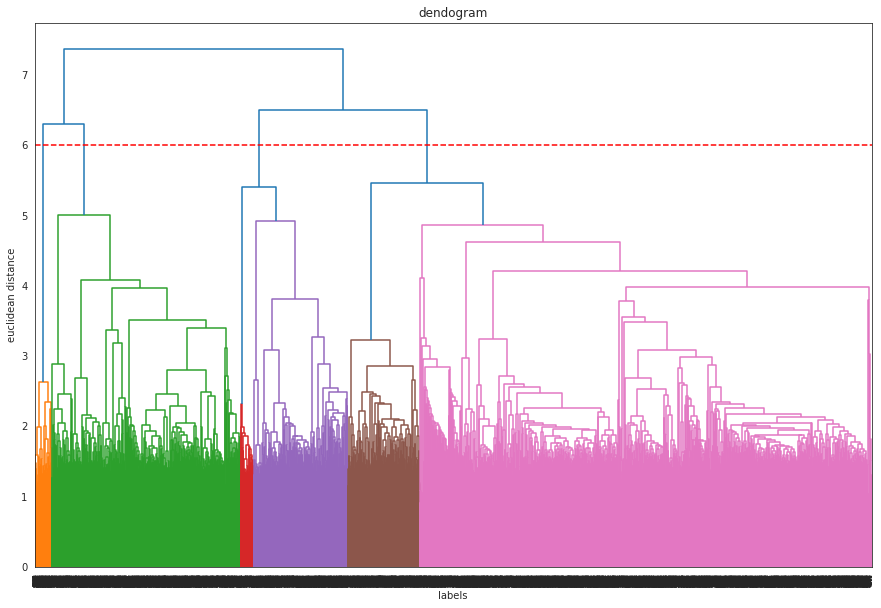

In [89]:
#plotting the dendrogram with known clusters and marking a horizontal line for the longest vertical distance
plt.figure(figsize=(15,10))
shc.dendrogram((shc.linkage(f_pca, method ='ward')))
plt.axhline(y=6, color='r', linestyle='--')
plt.title('dendogram')
plt.xlabel('labels')
plt.ylabel('euclidean distance')

**Number of clusters are 4**

In [82]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(f_pca)

for n_clusters:  2
silhouette_score is: 0.517855542636915
for n_clusters:  3
silhouette_score is: 0.27408781011326083
for n_clusters:  4
silhouette_score is: 0.22480411634417238
for n_clusters:  5
silhouette_score is: 0.2179805791078493
for n_clusters:  6
silhouette_score is: 0.2046487837363014


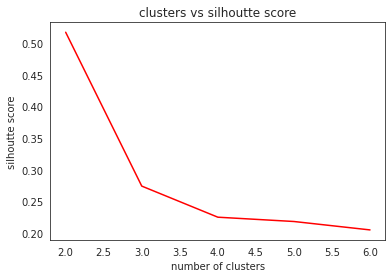

In [83]:
#silhouette score for each cluster
range=np.arange(2,7)
silhoutte_score=[]
for i in range:
 hierarchical = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
 hierarchical.fit(y_df)
 hc=hierarchical.fit_predict(y_df)
 lab=hierarchical.labels_
 silhoutte_score.append(silhouette_score(y_df,lab, metric='euclidean'))
 sil_score=silhouette_score(y_df,lab, metric='euclidean')
 print('for n_clusters: ', i)
  #for value in score:
 print('silhouette_score is: {}'.format(sil_score))

#plotting the graph for all the values
plt.plot(range,silhoutte_score,color='red')
plt.xlabel('number of clusters')
plt.ylabel('silhoutte score')
plt.title('clusters vs silhoutte score' )
plt.show()
  

* Silhouette score is indicative of better clustering results, suggesting well-separated and distinct clusters.
* It's important to compare the silhouette scores of different clustering algorithms and parameter settings to determine which one is the most appropriate for the given dataset.
* The cluster with the highest silhouette score of 0.517 is cluster 2, indicating that the data points within this cluster are well-separated and distinct compared to the other clusters

# DBSCAN

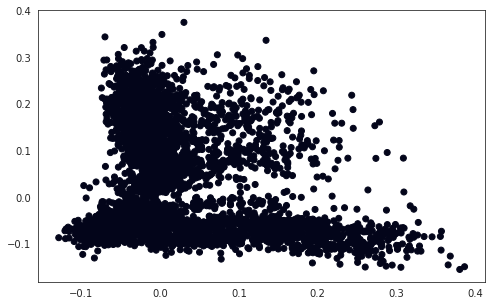

In [84]:
#plotting the dbscan plot to check the purity of the cluster 
db=DBSCAN(eps=0.3,min_samples=20)
db_pred=db.fit_predict(scaled_values)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(y=f_pca[:,0],x= f_pca[:,1], c=db_pred)

In [85]:
#finding all the labels
label=db.labels_

In [86]:
label

array([-1, -1, -1, ..., -1, -1, -1])

Observations from Dbscan:

*   The data labels are too tightly packed to form distinct clusters using the DBSCAN clustering algorithm.
*   Additionally, a label with a value of -1 indicates that the data point is considered an outlier or noise and cannot be assigned to any specific cluster. 



# conclusion



*  There are 69% of movie content and 31% of Tv show content in netflix
*  Content of top 10 countries accounts for 69.54% for overall contents present
*   United Nations has highest movie content released and then followed by India
*   United Nations has highest tv show content released and then followed by United Kingdom
*   Netflix started releasing movies after 1940 and after 1980 Tv show content was started streaming.
*   There is a graduall increase in releases after 2000 where movie content releases are more then Tv show content


*    In the month of january, october and december maximum movies/tvshows has been released.
*   Black Mirror: Bandersnatch is the longest movie and Grey's Anatomy is longest Tv show


*   Movies which are documentaries and stand up comedy has highest content in netflix and Tv shows for kids category has highest content in netflix

*   Most of the contents got rating TV_MA(Mature Audience)


*   After vectorizing text data by using TFIDF and pca dimensionality reduction we require 1500 components to summarize 90 percent of data
*   In k-means clustering Elbow method is used to find the number of optimal clusters and there are 10 clusters after applying kmeans clustering


*   To measure the quality of clusters and how well the clusters are separated, silhoutte score is considered. 
*   In K-Means clustering the sihoutte score is highest for cluster 2 and the score is 0.534


*   In hierarchical clustering dendrogram plot is used to find the optimal clusters and the number of clusters came out to be 4


*   The silhoutte score for hierarchical cluster is highest for cluster 2 and the silhouette_score is 0.517
*   By applying kmeans and hierarchical we got the best clusters and optimal cluster equal to 2



